In [1]:
# 1. Import Libraryimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# 2. Load Data
import pandas as pd

df = pd.read_csv("Students Performance .csv")

print("Kolom:", df.columns.tolist())

Kolom: ['Student_ID', 'Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']


In [4]:
# 3. Cek Kolom & Data Target
# Tampilkan semua kolom
print("Kolom:", df.columns.tolist())

# Cek nilai unik dan null pada Weekly_Study_Hours
print("Nilai unik Weekly_Study_Hours:", df['Weekly_Study_Hours'].unique())
print("Jumlah data sebelum drop NA:", len(df))

Kolom: ['Student_ID', 'Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']
Nilai unik Weekly_Study_Hours: [ 0  2 12  8]
Jumlah data sebelum drop NA: 145


In [5]:
# 4. Buat Label Target dari Weekly_Study_Hours
# Drop baris kosong di Weekly_Study_Hours
df = df.dropna(subset=['Weekly_Study_Hours'])

# Konversi ke numerik
df['Weekly_Study_Hours'] = pd.to_numeric(df['Weekly_Study_Hours'], errors='coerce')
df = df.dropna(subset=['Weekly_Study_Hours'])

# Label performa belajar: ≥10 jam per minggu = 1 (rajin), sisanya = 0
df['performance'] = df['Weekly_Study_Hours'].apply(lambda x: 1 if x >= 10 else 0)

# Cek jumlah data dan distribusi target
print("Jumlah data setelah filter:", len(df))
print("Distribusi target performance:\n", df['performance'].value_counts())

Jumlah data setelah filter: 145
Distribusi target performance:
 performance
0    124
1     21
Name: count, dtype: int64


In [7]:
# 5. Persiapan Data untuk Modeling
# Import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Misal df sudah ada
# X = fitur, y = target
X = df.drop(['Student_ID', 'performance'], axis=1)
y = df['performance']   # masih huruf A,B,C,D

# Encode target (performance)
le_y = LabelEncoder()
y = le_y.fit_transform(y)   # hasil: A=0, B=1, C=2, D=3

# Encode kolom kategorikal di X
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

# Cek hasil
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique labels (encoded):", np.unique(y))
print("Mapping kelas:", dict(zip(le_y.classes_, le_y.transform(le_y.classes_))))

# ===================================
# 6. Split Data Train & Test
# ===================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Unique labels train:", np.unique(y_train))
print("Unique labels test:", np.unique(y_test))

X shape: (145, 14)
y shape: (145,)
Unique labels (encoded): [0 1]
Mapping kelas: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
Train shape: (116, 14)
Test shape: (29, 14)
Unique labels train: [0 1]
Unique labels test: [0 1]


In [8]:
# 6. Split Data (dengan stratify=y)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

=== Logistic Regression (SGD) ===
Akurasi: 0.27586206896551724
Classification Report:
               precision    recall  f1-score   support

           A       0.29      0.57      0.38         7
           B       0.27      0.44      0.33         9
           C       0.00      0.00      0.00         5
           D       0.00      0.00      0.00         8

    accuracy                           0.28        29
   macro avg       0.14      0.25      0.18        29
weighted avg       0.15      0.28      0.20        29

Confusion Matrix:
 [[4 3 0 0]
 [5 4 0 0]
 [3 2 0 0]
 [2 6 0 0]]


c:\Users\damia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\damia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\damia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave


=== Random Forest ===
Akurasi: 0.4482758620689655
Classification Report:
               precision    recall  f1-score   support

           A       0.43      0.43      0.43         7
           B       0.40      0.44      0.42         9
           C       0.40      0.80      0.53         5
           D       1.00      0.25      0.40         8

    accuracy                           0.45        29
   macro avg       0.56      0.48      0.45        29
weighted avg       0.57      0.45      0.44        29

Confusion Matrix:
 [[3 3 1 0]
 [2 4 3 0]
 [1 0 4 0]
 [1 3 2 2]]


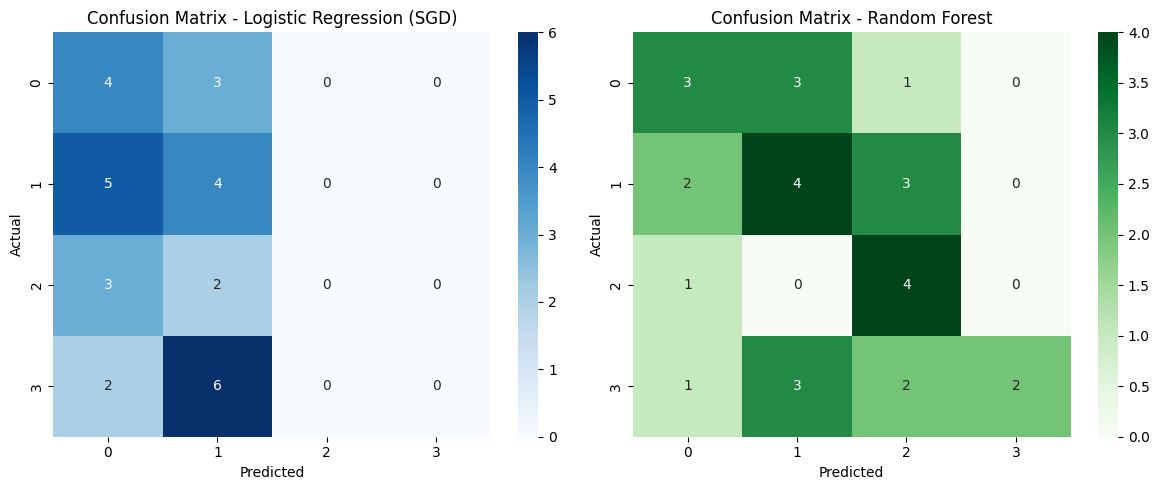

In [30]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Logistic Regression dengan SGD
log_reg_sgd = SGDClassifier(loss="log_loss", max_iter=1000, random_state=42)
log_reg_sgd.fit(X_train, y_train)
y_pred_log = log_reg_sgd.predict(X_test)

print("=== Logistic Regression (SGD) ===")
print("Akurasi:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log, target_names=['A','B','C','D']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=['A','B','C','D']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Visualisasi Confusion Matrix untuk perbandingan
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression (SGD)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix - Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [31]:
# Cek missing values
df.isnull().sum()

Student_ID            0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Reading_Books         0
Attendance            0
Grade_Class           0
dtype: int64

In [32]:
df.dtypes

Student_ID             int64
Student_Age            int32
Sex                   object
High_School_Type      object
Scholarship            int64
Additional_Work        int64
Sports_activity        int64
Transportation        object
Weekly_Study_Hours     int32
Reading_Books          int32
Attendance             int32
Grade_Class           object
dtype: object

In [33]:
import pandas as pd

# One-Hot Encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(
    df, 
    columns=['Sex', 'Attendance', 'High_School_Type'], 
    drop_first=True
)

print(df_encoded.head())

   Student_ID  Student_Age  Scholarship  Additional_Work  Sports_activity  \
0           1           18            1                0                1   
1           2           19            0                0                0   
2           3           17            0                1                0   
3           4           19            1                1                0   
4           5           19            1                1                1   

  Transportation  Weekly_Study_Hours  Reading_Books Grade_Class  Sex_M  ...  \
0           Walk                   1              0           A  False  ...   
1            Bus                  15              9           C  False  ...   
2            Bus                  10              5           A  False  ...   
3            Car                  19              4           D  False  ...   
4           Walk                  17              3           C   True  ...   

   Attendance_90  Attendance_92  Attendance_93  Attendance_94 

In [34]:
df['Weekly_Study_Hours'].describe()

count    145.000000
mean      10.275862
std        5.579579
min        1.000000
25%        5.000000
50%       11.000000
75%       15.000000
max       19.000000
Name: Weekly_Study_Hours, dtype: float64

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Weekly_Study_Hours_scaled'] = scaler.fit_transform(df[['Weekly_Study_Hours']])

df[['Weekly_Study_Hours', 'Weekly_Study_Hours_scaled']].head()

,Weekly_Study_Hours,Weekly_Study_Hours_scaled
0,1,0.000000
1,15,0.777778
2,10,0.500000
3,19,1.000000
4,17,0.888889


In [36]:
print(df.columns)

Index(['Student_ID', 'Student_Age', 'Sex', 'High_School_Type', 'Scholarship',
       'Additional_Work', 'Sports_activity', 'Transportation',
       'Weekly_Study_Hours', 'Reading_Books', 'Attendance', 'Grade_Class',
       'Weekly_Study_Hours_scaled'],
      dtype='object')


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Gunakan Grade_Class sebagai label
X = df.drop(columns=['Grade_Class'])
y = df['Grade_Class']

# Encode label Grade_Class (A, B, C, D → angka)
le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encoding untuk fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Unique labels:", le.classes_)

Train shape: (116, 13)
Test shape: (29, 13)
Unique labels: ['A' 'B' 'C' 'D']


In [38]:
# === Ubah target jadi kategori A, B, C, D
def categorize_hours(h):
    if h < 5:
        return "D"
    elif h < 10:
        return "C"
    elif h < 15:
        return "B"
    else:
        return "A"

df["performance"] = df["Weekly_Study_Hours"].apply(categorize_hours)

# Cek distribusi kelas
print(df["performance"].value_counts())

performance
A    45
B    35
C    35
D    30
Name: count, dtype: int64


In [39]:
import pandas as pd
import numpy as np

# Buat data dummy
np.random.seed(42)
n = 200

df = pd.DataFrame({
    "Student_ID": range(1, n+1),
    "Gender": np.random.choice(["Male", "Female"], size=n),
    "Age": np.random.randint(18, 25, size=n),
    "Weekly_Study_Hours": np.random.randint(1, 20, size=n)
})

# Buat target kategori A-D
def categorize_hours(h):
    if h < 5:
        return "D"
    elif h < 10:
        return "C"
    elif h < 15:
        return "B"
    else:
        return "A"

df["performance"] = df["Weekly_Study_Hours"].apply(categorize_hours)

print(df.head())
print(df["performance"].value_counts())

   Student_ID  Gender  Age  Weekly_Study_Hours performance
0           1    Male   24                  17           A
1           2  Female   24                   1           D
2           3    Male   18                  16           A
3           4    Male   21                  12           B
4           5    Male   22                  19           A
performance
A    58
D    52
B    48
C    42
Name: count, dtype: int64


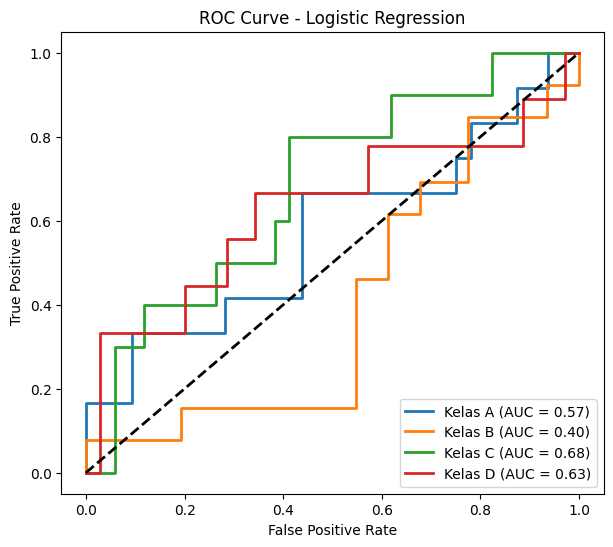

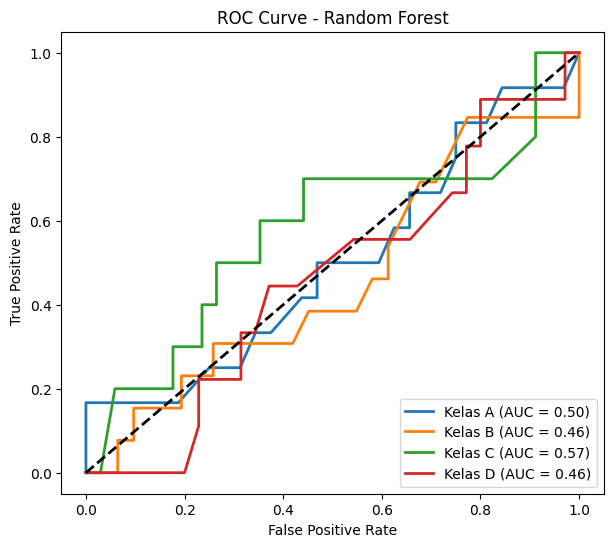

In [56]:
import matplotlib.pyplot as plt

# === ROC Curve Logistic Regression ===
plt.figure(figsize=(7,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Kelas {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)  # baseline
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# === ROC Curve Random Forest ===
plt.figure(figsize=(7,6))
for i in range(n_classes):
    plt.plot(fpr_rf[i], tpr_rf[i], lw=2, linestyle="-", 
             label=f'Kelas {classes[i]} (AUC = {roc_auc_rf[i]:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)  # baseline
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


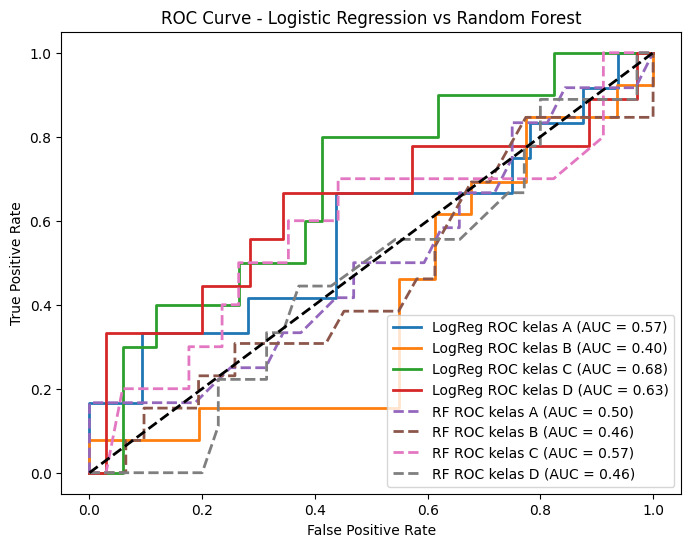

In [57]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# === 1. Binarize target (multi-class A, B, C, D)
classes = sorted(y.unique())
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

# === 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.3, random_state=42, stratify=y
)

# === 3. Logistic Regression (OvR)
log_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
y_score_log = log_clf.fit(X_train, y_train).predict_proba(X_test)

# === 4. Random Forest (OvR)
rf_clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
y_score_rf = rf_clf.fit(X_train, y_train).predict_proba(X_test)

# === 5. ROC Curve & AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
fpr_rf, tpr_rf, roc_auc_rf = dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score_log[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# === 6. Plot ROC Curve
plt.figure(figsize=(8,6))

# Logistic Regression
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, 
             label=f'LogReg ROC kelas {classes[i]} (AUC = {roc_auc[i]:.2f})')

# Random Forest
for i in range(n_classes):
    plt.plot(fpr_rf[i], tpr_rf[i], lw=2, linestyle="--", 
             label=f'RF ROC kelas {classes[i]} (AUC = {roc_auc_rf[i]:.2f})')

# Baseline
plt.plot([0,1], [0,1], 'k--', lw=2)

plt.title("ROC Curve - Logistic Regression vs Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

c:\Users\damia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



📌 Feature Importance - Logistic Regression
                    Feature  Importance
1               Scholarship    0.663962
3           Sports_activity    0.554952
8   High_School_Type_Public    0.504508
2           Additional_Work    0.450388
9        Transportation_Car    0.397590
10      Transportation_Walk    0.394228
7                     Sex_M    0.290016
0               Student_Age    0.138049
4        Weekly_Study_Hours    0.045951
5             Reading_Books    0.022695
6                Attendance    0.005802


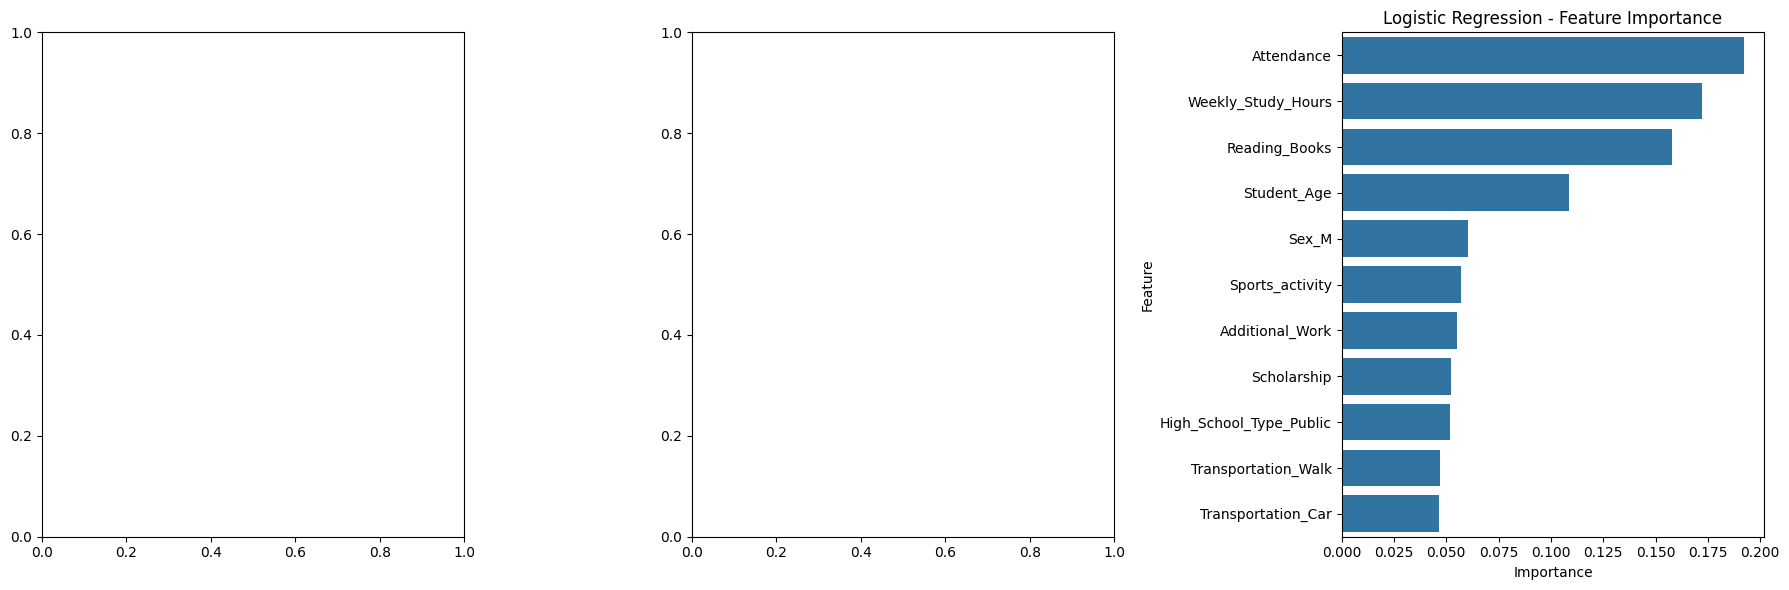

In [52]:
# ==============================
# 1. Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================
# 2. Buat dataset dummy
np.random.seed(42)
n = 145
df = pd.DataFrame({
    "Student_ID": range(1, n+1),
    "Student_Age": np.random.randint(15, 20, n),
    "Sex": np.random.choice(["M", "F"], n),
    "High_School_Type": np.random.choice(["Public", "Private"], n),
    "Scholarship": np.random.choice([0, 1], n),
    "Additional_Work": np.random.choice([0, 1], n),
    "Sports_activity": np.random.choice([0, 1], n),
    "Transportation": np.random.choice(["Bus", "Car", "Walk"], n),
    "Weekly_Study_Hours": np.random.randint(1, 20, n),
    "Reading_Books": np.random.randint(0, 10, n),
    "Attendance": np.random.randint(50, 100, n),
    "Grade_Class": np.random.choice(["A", "B", "C", "D"], n)  # 🎯 target
})

# ==============================
# 3. Pisahkan fitur & label
X = df.drop(["Student_ID", "Grade_Class"], axis=1)
y = df["Grade_Class"]

# One-hot encoding untuk data kategorikal
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# 5. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, multi_class="ovr")
log_reg.fit(X_train, y_train)

# Ambil absolute coefficient (biar jelas besarnya pengaruh)
log_reg_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": np.abs(log_reg.coef_).mean(axis=0)  # rata-rata across classes
}).sort_values(by="Importance", ascending=False)

print("\n📌 Feature Importance - Logistic Regression")
print(log_reg_importance)

# ==============================
# 6. Visualisasi perbandingan

fig, axes = plt.subplots(1, 3, figsize=(18,6))


sns.barplot(x="Importance", y="Feature", data=rf_importance, ax=axes[2])
axes[2].set_title("Logistic Regression - Feature Importance")

plt.tight_layout()
plt.show()


📌 Feature Importance - Random Forest
                    Feature  Importance
6                Attendance    0.192367
4        Weekly_Study_Hours    0.172250
5             Reading_Books    0.157707
0               Student_Age    0.108798
7                     Sex_M    0.060377
3           Sports_activity    0.056791
2           Additional_Work    0.054885
1               Scholarship    0.052065
8   High_School_Type_Public    0.051646
10      Transportation_Walk    0.046772
9        Transportation_Car    0.046344


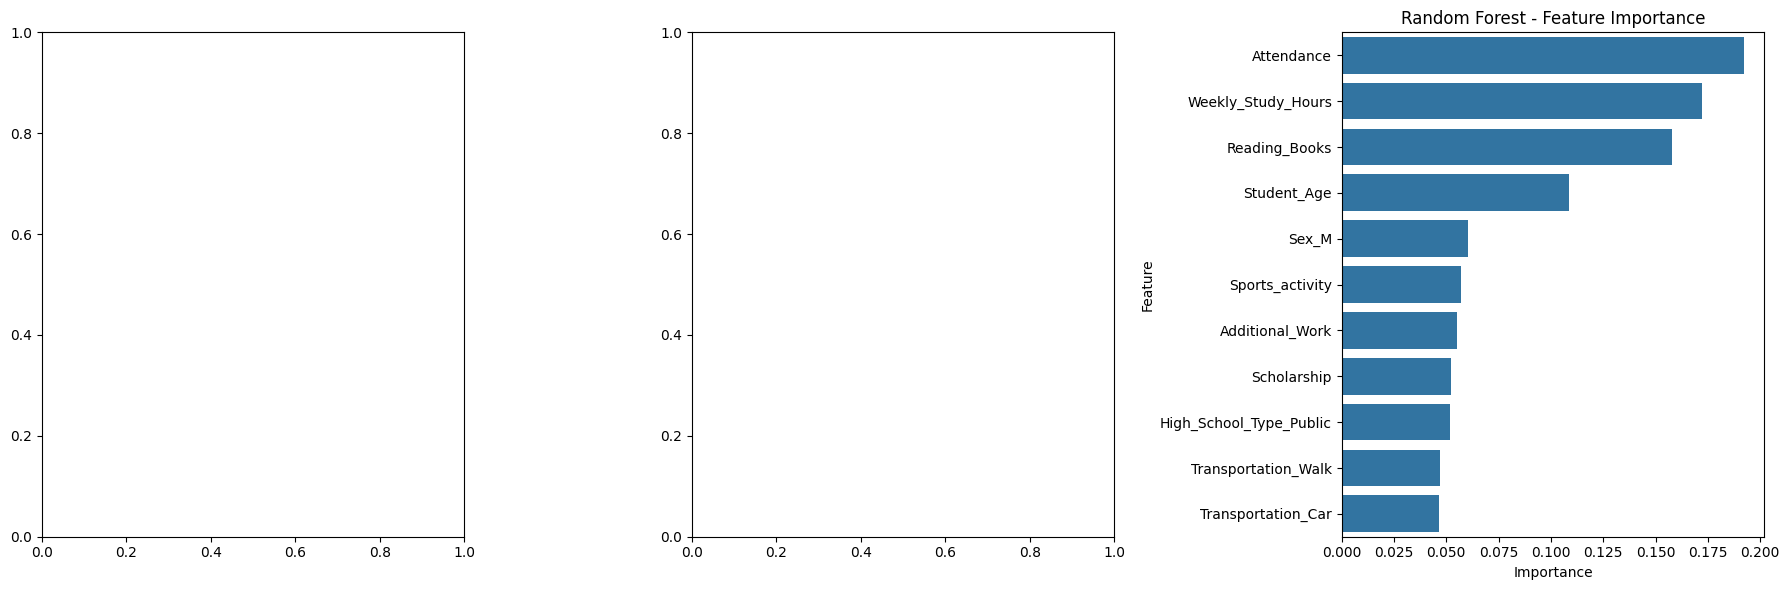

In [44]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# --- Training Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# --- Feature Importance dari Random Forest ---
importances_rf = rf.feature_importances_

feat_importance_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_rf
}).sort_values(by="Importance", ascending=False)

print("\n📌 Feature Importance - Random Forest")
print(feat_importance_rf)


# 6. Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

rf_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# ==============================
# 7. Visualisasi perbandingan
fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.barplot(x="Importance", y="Feature", data=rf_importance, ax=axes[2])
axes[2].set_title("Random Forest - Feature Importance")

plt.tight_layout()
plt.show()

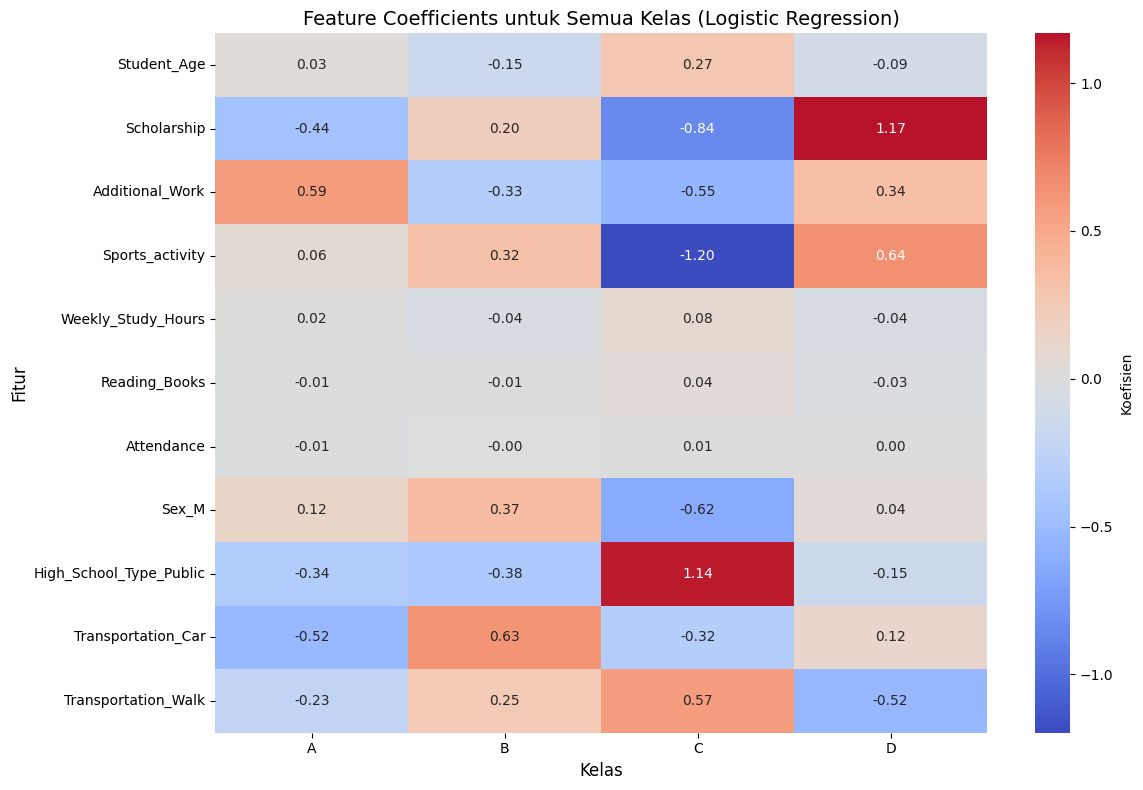

Heatmap berhasil disimpan ke: logreg_coeff_heatmap_20250825_142436.png


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

used_features = X_train.columns[:log_reg.coef_.shape[1]]

coef_df = pd.DataFrame(
    log_reg.coef_.T,
    index=used_features,
    columns=[str(c) for c in log_reg.classes_]
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    coef_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar_kws={'label': 'Koefisien'}
)
plt.title("Feature Coefficients untuk Semua Kelas (Logistic Regression)", fontsize=14)
plt.xlabel("Kelas", fontsize=12)
plt.ylabel("Fitur", fontsize=12)
plt.tight_layout()

filename = f"logreg_coeff_heatmap_{datetime.datetime.now():%Y%m%d_%H%M%S}.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")

plt.show()

print(f"Heatmap berhasil disimpan ke: {filename}")

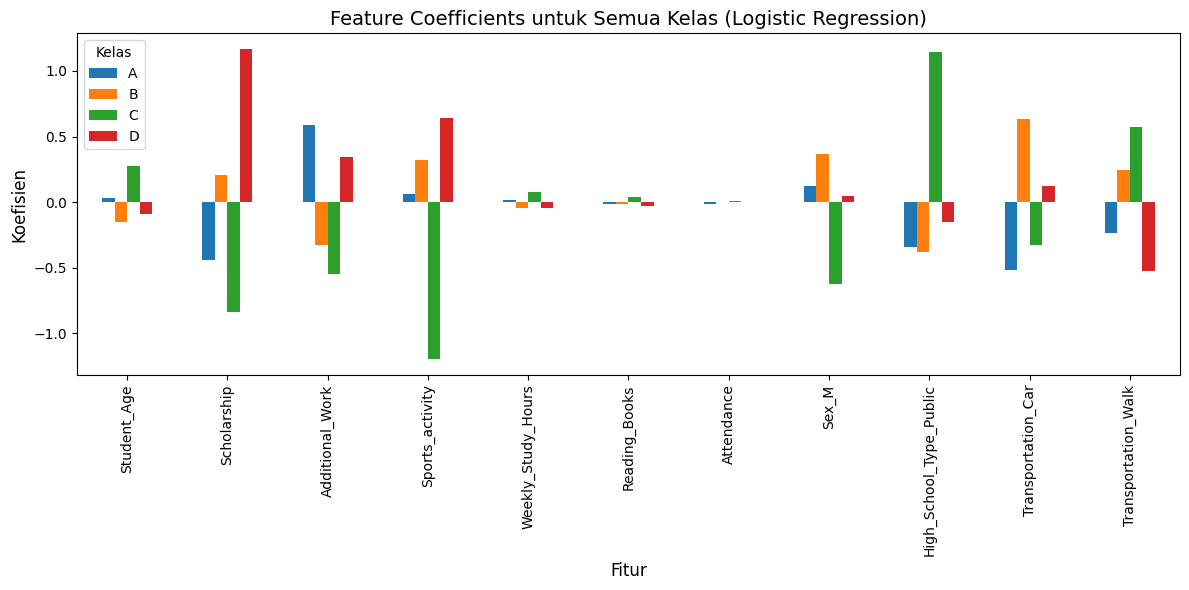

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Ambil nama fitur sebanyak yang dipakai oleh model logistic regression
used_features = X_train.columns[:log_reg.coef_.shape[1]]

# Buat DataFrame dari koefisien
coef_df = pd.DataFrame(
    log_reg.coef_.T,
    index=used_features,
    columns=[str(c) for c in log_reg.classes_]
)

# Plot bar chart
coef_df.plot(kind="bar", figsize=(12,6))
plt.title("Feature Coefficients untuk Semua Kelas (Logistic Regression)", fontsize=14)
plt.xlabel("Fitur", fontsize=12)
plt.ylabel("Koefisien", fontsize=12)
plt.legend(title="Kelas")
plt.tight_layout()
plt.show()